In [2]:
# For TensorFlow's Keras
import tensorflow.keras
print(tensorflow.keras.__file__)

# For standalone Keras, if you have it installed
import keras
print(keras.__file__)
    
# import keras.applications.vgg19 
# print(keras.applications.vgg19.__file__)

# !tensorflow --version

2024-09-19 15:45:10.265675: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/opt/miniconda3/envs/BinBud/lib/python3.10/site-packages/keras/api/_v2/keras/__init__.py
/opt/miniconda3/envs/BinBud/lib/python3.10/site-packages/keras/__init__.py


In [3]:
import warnings
# warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import plotly.graph_objects as go
from PIL import Image
import cv2
import os

import tensorflow as tf
from keras import layers
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



In [4]:
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)

print("PIL: ", Image.__version__)
print("cv2: ", cv2.__version__)
print("tensorflow: ", tf.__version__)
print("keras: ", tf.keras.__version__)  # Keras is part of TensorFlow 2.x



numpy:  1.23.5
pandas:  2.1.2
seaborn:  0.13.2
PIL:  10.1.0
cv2:  4.10.0
tensorflow:  2.12.0
keras:  2.12.0


In [5]:
data_path = '/Users/BroBro/Desktop/FinalDataset'
data_classes = os.listdir(data_path)


RGB


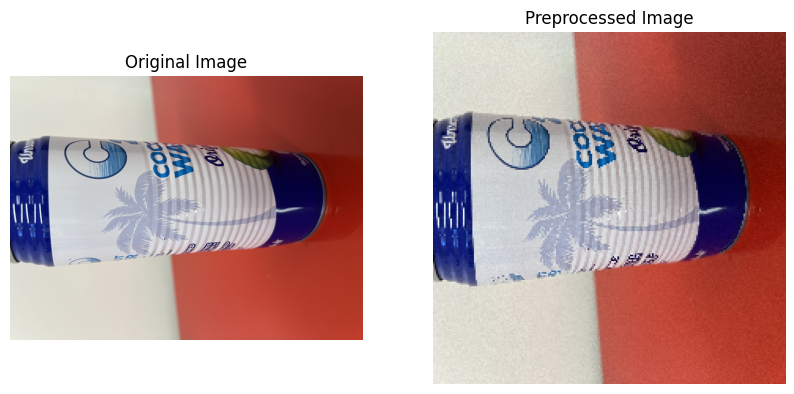

In [6]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
from PIL import Image

def image_preprocessing(img_path):
    # Load the image with the specified target size (resize only)
    img = load_img(img_path, target_size=(224, 224))
    print(img.mode)
    if img.mode != 'RGB':
        print("converting Image")
        img = img.convert('RGB')
    # Convert the image to a numpy array
    # img = img_to_array(img)
    # Expand dimensions to match the expected input shape (1, 224, 224, 3)
    img = np.expand_dims(img, axis=0)
    return img

def plot_images(original, preprocessed):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    axs[1].imshow(np.squeeze(preprocessed, axis=0))
    axs[1].set_title('Preprocessed Image')
    axs[1].axis('off')
    plt.show()

img_path = '/Users/BroBro/Desktop/FinalDataset/metal/IMG_2439.JPG'
original_image = Image.open(img_path)
preprocessed_image = image_preprocessing(img_path)
plot_images(original_image, preprocessed_image)

Model Architecture:

To prevent overfitting when using VGG16, the team will apply the technique of fine-tuning the pre-trained model.
Since VGG16 has up to 21 layers, we will freeze the first 2 layers (excluding the 2 layers of data layers that will not do weight training) → Then, we will fine-tune the remaining 16 layers to avoid overfit (dropout, batch-normalization,...) to improve the quality of the model.

In [15]:
# Running the MODEL 




BATCH_SIZE = 64
n_classes = 14

# VGG16 base model
conv_base = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)







# Import necessary libraries
import tensorflow as tf
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Assuming 'conv_base' and other necessary parts of your code are defined above this section
# Freeze layers in the convolutional base
for layer in conv_base.layers[:-2]:
    layer.trainable = False

# Adding custom layers on top of the convolutional base
top_model = conv_base.output
top_model = Flatten(name="flatten")(top_model)
top_model = Dense(512, activation='relu')(top_model)
top_model = BatchNormalization()(top_model)
# top_model = Dropout(0.5)(top_model)
top_model = Dense(256, activation='relu')(top_model)
top_model = BatchNormalization()(top_model)
# top_model = Dropout(0.5)(top_model)
output_layer = Dense(n_classes, activation='softmax')(top_model)

# Final Model
model = Model(inputs=conv_base.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 
# Now using different preprocessing. I'm worried that I'm doind something wrong. 
gen_train = ImageDataGenerator(rescale=1./255,rotation_range=45)  # No preprocess_input, just rescaling pixel values to [0, 1]
train_data = gen_train.flow_from_directory(data_path, target_size=(224, 224), batch_size=BATCH_SIZE, class_mode="categorical", shuffle=True)

# Set up callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2),
    ModelCheckpoint('model_best.keras', monitor='val_loss', save_best_only=True)
]




# Training the model
history = model.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=8,  # Adjust epochs according to your needs
    callbacks=callbacks
)

# Save the trained model
model.save('/Users/BroBro/Desktop/DeployModel.keras')

Found 21335 images belonging to 14 classes.
Epoch 1/8


2024-09-19 18:20:24.549035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


334/334 [==============================] - 1562s 5s/step - loss: 0.8394 - accuracy: 0.7342 - lr: 0.0010
Epoch 2/8
334/334 [==============================] - 2097s 6s/step - loss: 0.4709 - accuracy: 0.8453 - lr: 0.0010
Epoch 3/8
334/334 [==============================] - 2026s 6s/step - loss: 0.3503 - accuracy: 0.8885 - lr: 0.0010
Epoch 4/8
334/334 [==============================] - 2034s 6s/step - loss: 0.2651 - accuracy: 0.9141 - lr: 0.0010
Epoch 5/8
334/334 [==============================] - 1918s 6s/step - loss: 0.2176 - accuracy: 0.9287 - lr: 0.0010
Epoch 6/8
334/334 [==============================] - 2132s 6s/step - loss: 0.1787 - accuracy: 0.9409 - lr: 0.0010
Epoch 7/8
334/334 [==============================] - 2099s 6s/step - loss: 0.1668 - accuracy: 0.9460 - lr: 0.0010
Epoch 8/8
334/334 [==============================] - 2026s 6s/step - loss: 0.1392 - accuracy: 0.9543 - lr: 0.0010


In [17]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import coremltools as ct

# Define output labels
output_labels = ["battery", "biological", "cardboard", "cement", "clothes", "electronics", "glass", "leather", "metal", "paper", "plastic", "rubber", "trash", "wood"]

# Step 1: Load the Keras model from the .h5 file
model = load_model('/Users/BroBro/Desktop/DeployModel.keras')
print(model.input_names)

# Step 2: Convert the Keras model to Core ML format with correct input type and preprocessing


coreml_model = ct.convert(
    model,
    inputs=[ct.ImageType(name="input_2", shape=(1, 224, 224, 3), scale=1/255.0)],  # This handles scaling
    classifier_config=ct.ClassifierConfig(output_labels)
)




# Step 3: Save the Core ML model to a file
coreml_model.save('/Users/BroBro/Desktop/DeployModel.mlpackage')

print("Model conversion complete. The Core ML model has been saved as 'DeployModel.mlmodel'.")


['input_2']


2024-09-20 08:30:27.005298: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2024-09-20 08:30:28.282286: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
When both 'convert_to' and 'minimum_deployment_target' not specified, 'convert_to' is set to "mlprogram" and 'minimum_deployment_target' is set to ct.target.iOS15 (which is same as ct.target.macOS12). Note: the model will not run on systems older than iOS15/macOS12/watchOS8/tvOS15. In order to make your model run on older system, please set the 'minimum_deployment_target' to iOS14/iOS13. Details please see the link: https://apple.github.io/coremltools/docs-guides/source/target-conversion-formats.html
2024-09-20 08:30:29.765092: I tensorflow/core/grappler/devices.cc:75] Number of eligib

Model conversion complete. The Core ML model has been saved as 'DeployModel.mlmodel'.


# CORE ML MODEL 

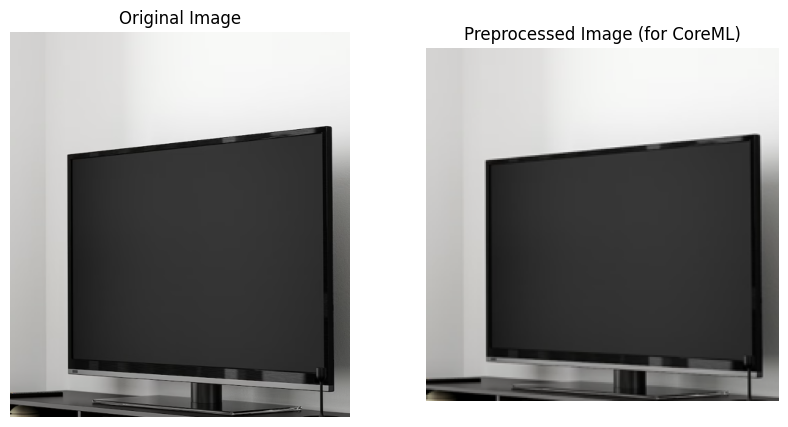

{'biological': 6.407756245607743e-06, 'cement': 0.0014279624447226524, 'glass': 1.55402667587623e-05, 'battery': 0.007775761652737856, 'cardboard': 0.2017919421195984, 'leather': 0.00011936569353565574, 'electronics': 0.24437138438224792, 'paper': 0.5290451645851135, 'trash': 0.004248820710927248, 'wood': 0.0022704850416630507, 'clothes': 5.7511388149578124e-05, 'plastic': 1.5892304872977547e-05, 'rubber': 0.001997102750465274, 'metal': 0.006856643594801426}
Predicted class: paper
Probability: 0.5290451645851135


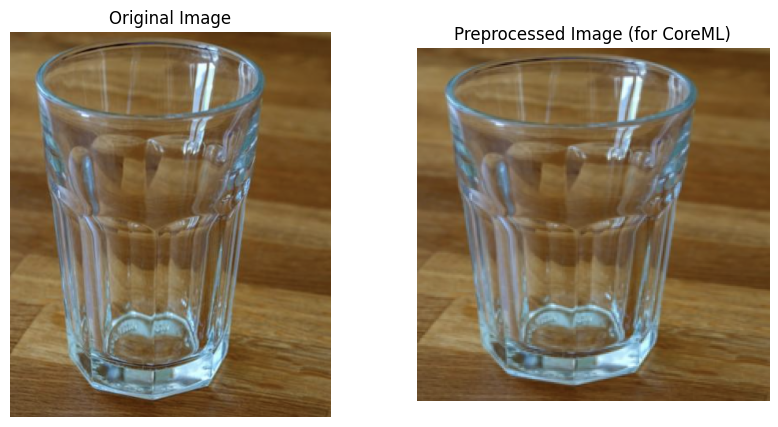

{'biological': 2.8401887902873568e-05, 'cement': 3.8027362734283088e-06, 'glass': 0.998788058757782, 'battery': 8.031260222196579e-06, 'cardboard': 2.4747061615926214e-05, 'leather': 1.578651790623553e-06, 'electronics': 4.39786454080604e-05, 'paper': 0.00017757258319761604, 'trash': 4.8798614926681694e-08, 'wood': 2.580609134383849e-06, 'clothes': 8.578100278100464e-06, 'plastic': 4.7914214519551024e-05, 'rubber': 1.7918564765295741e-07, 'metal': 0.0008645724155940115}
Predicted class: glass
Probability: 0.998788058757782


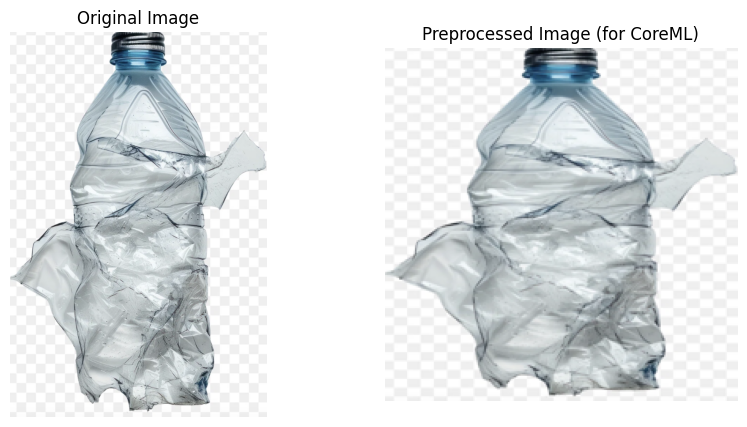

{'biological': 0.0002044980792561546, 'cement': 0.00027227518148720264, 'glass': 0.011243860237300396, 'battery': 3.2558568818785716e-07, 'cardboard': 1.0400000149957123e-07, 'leather': 0.0003464645124040544, 'electronics': 2.446685698487272e-07, 'paper': 0.06185220181941986, 'trash': 0.0002622763277031481, 'wood': 4.327812632709538e-07, 'clothes': 0.07106012850999832, 'plastic': 0.8547558188438416, 'rubber': 5.793217496830039e-07, 'metal': 7.133613166843134e-07}
Predicted class: plastic
Probability: 0.8547558188438416


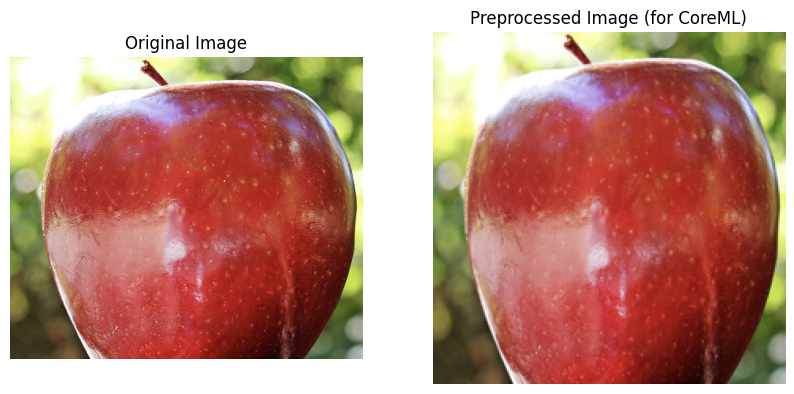

{'biological': 0.9911541938781738, 'cement': 7.669232218177058e-06, 'glass': 0.0014947858871892095, 'battery': 2.50509355481654e-08, 'cardboard': 1.1349070572208575e-09, 'leather': 0.0069503155536949635, 'electronics': 0.00018653279403224587, 'paper': 9.980642516893568e-07, 'trash': 5.070942066254247e-08, 'wood': 1.9728833677845614e-08, 'clothes': 0.00019340188009664416, 'plastic': 2.201239510668529e-07, 'rubber': 2.109944006178921e-07, 'metal': 1.155511290562572e-05}
Predicted class: biological
Probability: 0.9911541938781738


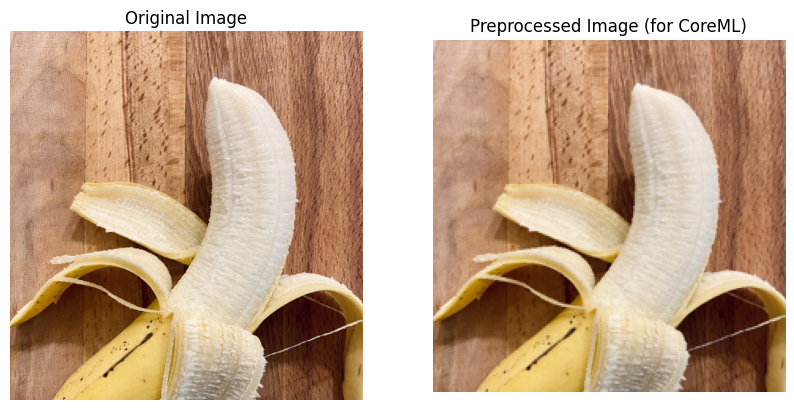

{'biological': 0.10092157870531082, 'cement': 0.0002492147614248097, 'glass': 0.0007030904525890946, 'battery': 0.0001015373709378764, 'cardboard': 0.00028682677657343447, 'leather': 0.0016476553864777088, 'electronics': 0.3891869783401489, 'paper': 0.005763709545135498, 'trash': 0.19317078590393066, 'wood': 8.954382792580873e-06, 'clothes': 0.2698535621166229, 'plastic': 0.012782279402017593, 'rubber': 0.025090720504522324, 'metal': 0.0002331459691049531}
Predicted class: electronics
Probability: 0.3891869783401489


In [19]:
import coremltools as ct
from PIL import Image

import matplotlib.pyplot as plt

# Load the Core ML model
coreml_model = ct.models.MLModel('/Users/BroBro/Desktop/DeployModel.mlpackage')

# Define output labels (same as in Keras)
output_labels = ["battery", "biological", "cardboard", "cement", "clothes", "electronics", "glass", "leather", "metal", "paper", "plastic", "rubber", "trash", "wood"]

# Image preprocessing function (similar to Keras but keeps it as a PIL image)
def image_preprocessing(img_path):
    # Load the image and resize to (224, 224)
    img = Image.open(img_path)
    img = img.resize((224, 224))
    
    # Convert to RGB if not already
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    return img

def plot_images(original, preprocessed):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    # No need to squeeze for PIL images
    axs[1].imshow(preprocessed)
    axs[1].set_title('Preprocessed Image (for CoreML)')
    axs[1].axis('off')
    plt.show()

# Load and preprocess the test image
folder_path = '/Users/BroBro/Desktop/Images/'
for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            original_image = Image.open(img_path)
            preprocessed_image = image_preprocessing(img_path)

            # Plot the images for comparison
            plot_images(original_image, preprocessed_image)

            # Prepare the input dictionary for CoreML (PIL Image)
            input_dict = {'input_2': preprocessed_image}

            # Run the prediction
            output = coreml_model.predict(input_dict)

            # Get the predicted value (extract the classLabel probabilities)
            class_probs = output['classLabel_probs']
            print(class_probs)
            # Get the class with the highest probability
            predicted_class = max(class_probs, key=class_probs.get)
            predicted_value = class_probs[predicted_class]

            # Print the predicted class and its probability
            print(f"Predicted class: {predicted_class}")
            print(f"Probability: {predicted_value}")


# KERAS TESTS: 
***

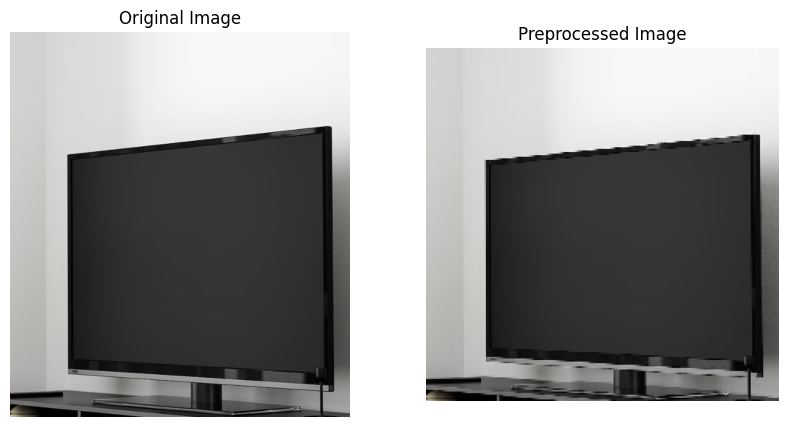

1/1 [==============================] - 0s 357ms/step
tv.png: Your waste material is electronics with 100.0% accuracy.
Your waste material is electronics. Therefore, you should dispose of it at an e-waste facility.


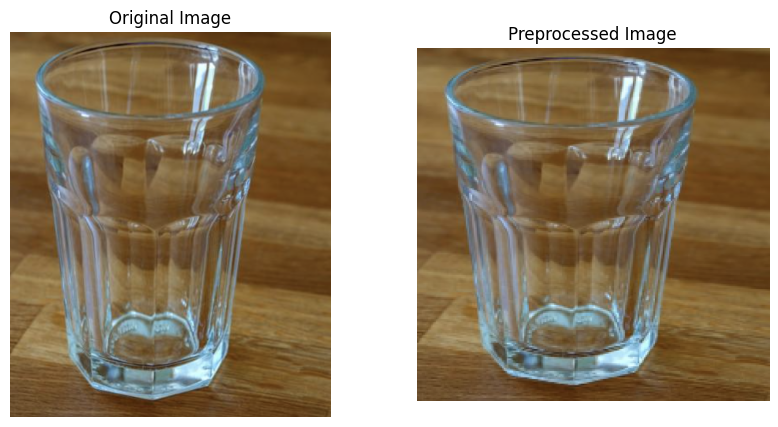

1/1 [==============================] - 0s 87ms/step
glasscuo.png: Your waste material is glass with 100.0% accuracy.
Your waste material is glass. Therefore, you should recycle it.


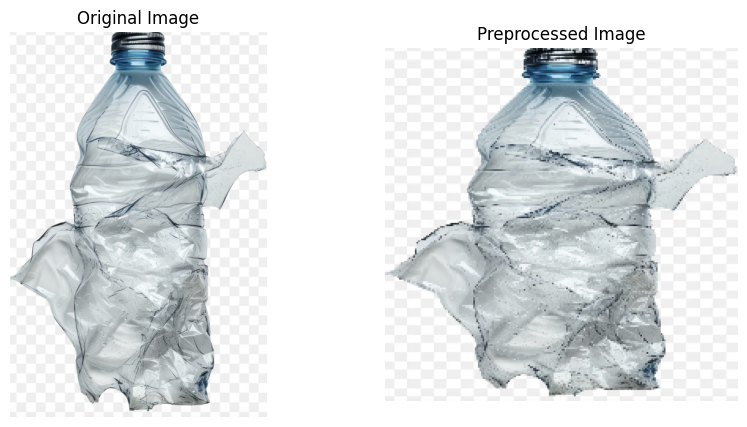

1/1 [==============================] - 0s 91ms/step
bottle.png: Your waste material is glass with 100.0% accuracy.
Your waste material is glass. Therefore, you should recycle it.


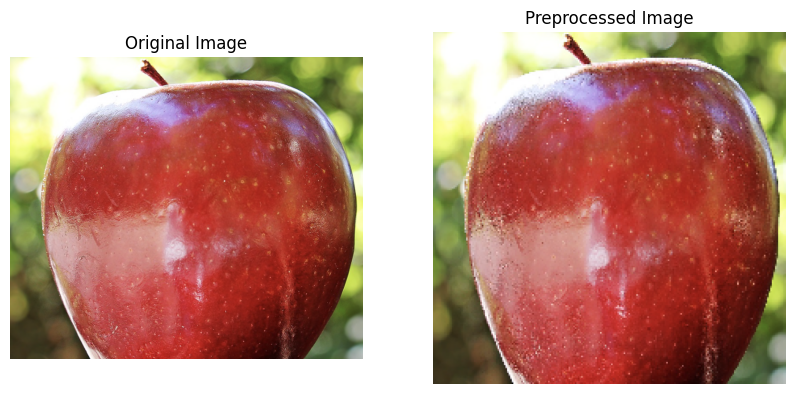

1/1 [==============================] - 0s 105ms/step
apple.png: Your waste material is biological with 100.0% accuracy.
Your waste material is biological. Therefore, you should compost it.


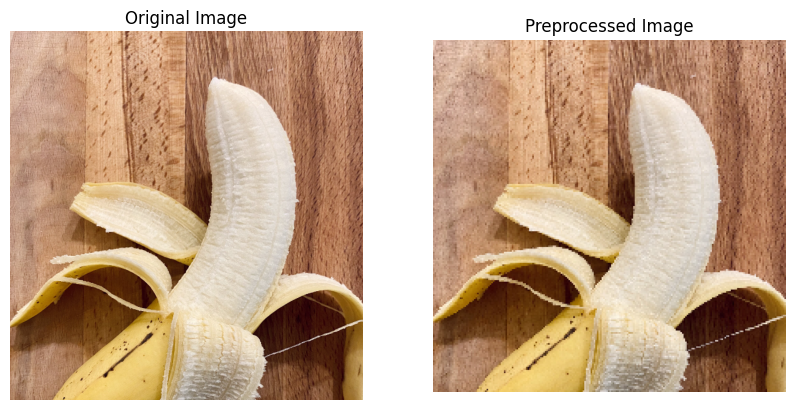

1/1 [==============================] - 0s 88ms/step
banana.png: Your waste material is electronics with 100.0% accuracy.
Your waste material is electronics. Therefore, you should dispose of it at an e-waste facility.


In [20]:
import numpy as np
import os
from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image
import matplotlib.pyplot as plt
from keras.applications.vgg16 import preprocess_input

# Load the model
vgg16 = load_model('/Users/BroBro/Desktop/BinBudRelease3.keras')
output_labels = ["battery", "biological", "cardboard", "cement", "clothes", "electronics", "glass", "leather", "metal", "paper", "plastic", "rubber", "trash", "wood"]

def image_preprocessing(img_path):
    # Load the image with the specified target size
    img = load_img(img_path, target_size=(224, 224))  # Load and resize image
    img_array = img_to_array(img)  # Convert image to NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model's input shape
      # Preprocess image (VGG16 specific)
    return img_array

def plot_images(original, preprocessed):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display the original image
    axs[0].imshow(original)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    # Display the preprocessed image (convert to uint8 format for display)
    preprocessed_img = np.squeeze(preprocessed, axis=0).astype(np.uint8)
    axs[1].imshow(preprocessed_img)
    axs[1].set_title('Preprocessed Image')
    axs[1].axis('off')
    
    plt.show()

def predict_folder(folder_path):
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            original_image = Image.open(img_path)
            preprocessed_image = image_preprocessing(img_path)
            plot_images(original_image, preprocessed_image)
            
            # Make prediction
            predicted_array = vgg16.predict(preprocessed_image)
            
            predicted_value = output_labels[np.argmax(predicted_array)]
            predicted_accuracy = round(np.max(predicted_array) * 100, 2)
            
            print(f"{img_file}: Your waste material is {predicted_value} with {predicted_accuracy}% accuracy.")
            
            if predicted_accuracy > 50: 
                if predicted_value in ["battery", "electronics"]:
                    print(f"Your waste material is {predicted_value}. Therefore, you should dispose of it at an e-waste facility.")
                elif predicted_value == "biological":
                    print(f"Your waste material is {predicted_value}. Therefore, you should compost it.")
                elif predicted_value == "cardboard":
                    print(f"Your waste material is {predicted_value}. Therefore, you should recycle it.")
                elif predicted_value == "cement":
                    print(f"Your waste material is {predicted_value}. It should be disposed of in construction waste.")
                elif predicted_value == "clothes":
                    print(f"Your waste material is {predicted_value}. Therefore, you should donate it or dispose of it in a textile recycling bin.")
                elif predicted_value == "glass":
                    print(f"Your waste material is {predicted_value}. Therefore, you should recycle it.")
                elif predicted_value == "leather":
                    print(f"Your waste material is {predicted_value}. Consider donating it or using a special waste disposal service.")
                elif predicted_value == "metal":
                    print(f"Your waste material is {predicted_value}. Therefore, you should recycle it.")
                elif predicted_value == "paper":
                    print(f"Your waste material is {predicted_value}. Therefore, you should recycle it.")
                elif predicted_value == "plastic":
                    print(f"Your waste material is {predicted_value}. Therefore, you should recycle it if it's recyclable or dispose of it properly.")
                elif predicted_value == "rubber":
                    print(f"Your waste material is {predicted_value}. Consider taking it to a special recycling or disposal facility.")
                elif predicted_value == "trash":
                    print(f"Your waste material is {predicted_value}. Unfortunately, this should go to the landfill.")
                elif predicted_value == "wood":
                    print(f"Your waste material is {predicted_value}. It can often be recycled or repurposed, depending on the condition.")
            else: 
                print("Our accuracy is not high enough. Please try taking another photo.")

# Example usage
folder_path = '/Users/BroBro/Desktop/Images'
predict_folder(folder_path)


c:\Users\16332\.conda\envs\HackDavis\Lib\site-packages\keras\_tf_keras\keras\__init__.py
c:\Users\16332\.conda\envs\HackDavis\Lib\site-packages\keras\__init__.py


keras:  3.3.3
tensorflow:  2.16.1


In [13]:
# Assuming you have already loaded your trained model
from keras.models import load_model
model = load_model('/Users/BroBro/Desktop/FinalModel.keras')

# Prepare the test data using the same preprocessing
gen_test = ImageDataGenerator(rescale=1./255, rotation_range=90)  # Same preprocessing as training
test_data = gen_test.flow_from_directory(data_path, target_size=(224, 224), batch_size=BATCH_SIZE, class_mode="categorical", shuffle=False)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_data, steps=len(test_data))

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Found 21370 images belonging to 14 classes.


2024-09-19 17:32:06.758432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


334/334 [==============================] - 1462s 4s/step - loss: 0.6096 - accuracy: 0.8075
Test Loss: 0.6096311807632446
Test Accuracy: 0.8075339198112488


# more training: 

In [ ]:
from keras.models import load_model

# Load the previously saved model
model = load_model('/Users/BroBro/Desktop/FinalModel.keras')

# Recreate the ImageDataGenerator
gen_train = ImageDataGenerator(rescale=1./255, rotation_range=90)  # Using the same preprocessing
train_data = gen_train.flow_from_directory(data_path, target_size=(224, 224), batch_size=BATCH_SIZE, class_mode="categorical", shuffle=True)

# Set up the callbacks again (if needed)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2),
    ModelCheckpoint('model_best.keras', monitor='val_loss', save_best_only=True)
]

# Continue training for more epochs
history = model.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=4,  # Run for more epochs as needed
    callbacks=callbacks
)

model.save('/Users/BroBro/Desktop/FinalModel.keras')

